In [25]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import combinations

In [4]:
import nxviz as nv

In [5]:
G = nx.erdos_renyi_graph(n=20, p=0.3)

In [6]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19))

In [7]:
G.edges()

EdgeView([(0, 3), (0, 5), (0, 6), (0, 7), (0, 9), (0, 11), (0, 12), (0, 14), (0, 18), (0, 19), (1, 2), (1, 3), (1, 6), (1, 9), (1, 10), (1, 12), (2, 4), (2, 9), (2, 15), (2, 18), (3, 4), (3, 8), (3, 9), (3, 17), (3, 18), (4, 6), (4, 7), (4, 13), (4, 14), (4, 19), (5, 7), (5, 9), (5, 10), (5, 18), (6, 8), (6, 10), (6, 11), (6, 13), (6, 14), (6, 17), (7, 9), (7, 11), (7, 14), (8, 13), (8, 14), (8, 15), (8, 18), (8, 19), (9, 10), (9, 14), (9, 17), (9, 18), (9, 19), (10, 11), (10, 16), (11, 12), (12, 13), (12, 14), (12, 16), (13, 18), (14, 18), (15, 16), (15, 17), (16, 17), (16, 18), (17, 18), (17, 19)])

/Volumes/OWC_Big_Phatty/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


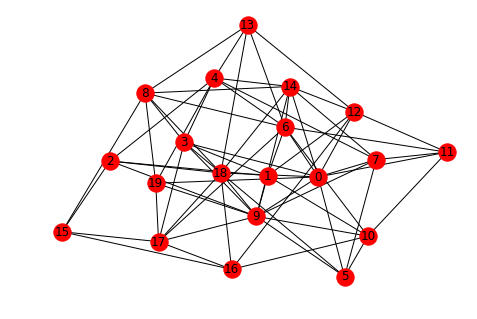

In [8]:
nx.draw(G, with_labels=True)

## Basic Graph Properties

In [14]:
# Number of nodes
len(G.nodes())

20

In [15]:
# Number of edges
len(G.edges())

67

### Centrality

In [51]:
deg_cent = nx.degree_centrality(G)
deg_cent_df = pd.DataFrame(list(deg_cent.values()), list(deg_cent.keys()))
print('Average degree centrality of graph G is {}'.format(deg_cent_df.mean().loc[0]))

Average degree centrality of graph G is 0.3526315789473685


In [52]:
deg_bet = nx.betweenness_centrality(G)
deg_bet_df = pd.DataFrame(list(deg_bet.values()), list(deg_bet.keys()))
print('Average betweenness_centrality centrality of graph G is {}'.format(deg_bet_df.mean().loc[0]))

Average betweenness_centrality centrality of graph G is 0.03801169590643274


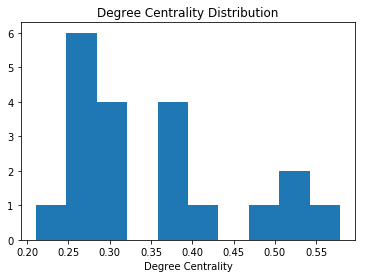

In [55]:
plt.hist(list(nx.degree_centrality(G).values()))
plt.title('Degree Centrality Distribution')
plt.xlabel('Degree Centrality')
plt.show()

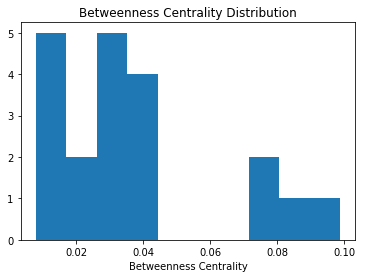

In [56]:
plt.hist(list(nx.betweenness_centrality(G).values()))
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.show()

## Subgraph

In [9]:
# Define get_nodes_and_nbrs()
def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []

    # Iterate over the nodes of interest
    for n in nodes_of_interest:

        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)

        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):

            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)

    return G.subgraph(nodes_to_draw)


/Volumes/OWC_Big_Phatty/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


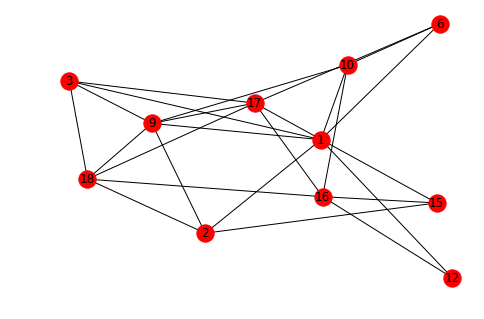

In [13]:
nodes_of_interest = [16, 1]
G_draw = get_nodes_and_nbrs(G, nodes_of_interest)
nx.draw(G_draw, with_labels=True)
plt.show()

## Alternative Visualization with nxviz

In general, nxviz was made to vizualize very large graphs, so there isn't as much support for many vizualization characteristics such as node labels, etc. But graph metadata, such as groups or clusters, can be used in a variety of ways. 

#### Circos Plot

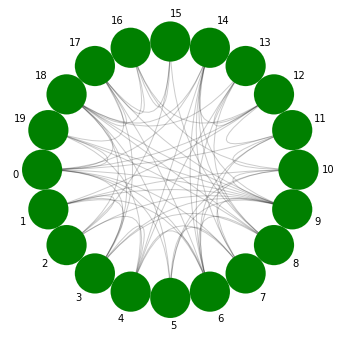

In [90]:
c = nv.CircosPlot(G,node_labels=True)
c.node_colors = ["green" for node_color in c.node_colors]
c.draw()
# node labels are implemented here

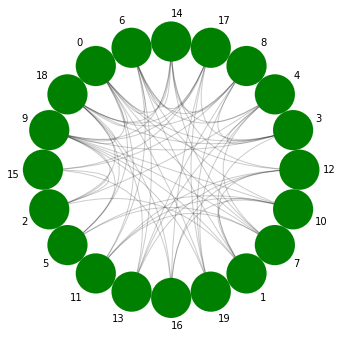

In [91]:
# Node ordering in circosplot
# Iterate over all the nodes, including the metadata
for n, d in G.nodes(data=True):

    # Calculate the degree of each node
    G.node[n]['degree'] = nx.degree(G, n)
    
c = nv.CircosPlot(G,node_labels=True, node_order='degree')
c.node_colors = ["green" for node_color in c.node_colors]
c.draw()

#### Matrix Plot

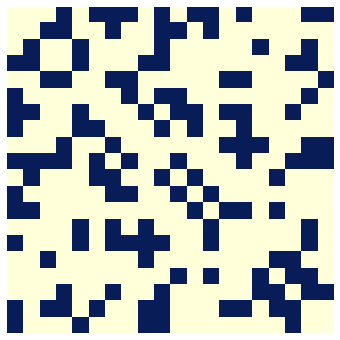

In [76]:
# Create the customized MatrixPlot object: h
h = nv.MatrixPlot(graph=G)

# Draw the MatrixPlot to the screen
h.draw()
plt.show()

## note: as of yet, there isn't support for showing node labels in a matrix plot

#### ArcPlot

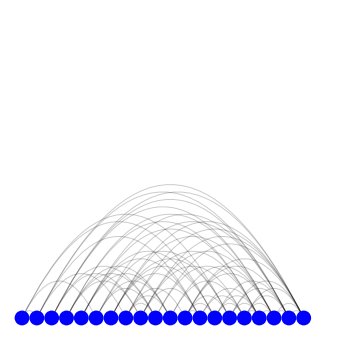

In [74]:
# Iterate over all the nodes in G, including the metadata
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G, n)

# Create the ArcPlot object: a
a = nv.ArcPlot(graph=G,node_order='degree', node_labels=True)

# Draw the ArcPlot to the screen
a.draw()
plt.show()

In [86]:
G.nodes(data=True)

NodeDataView({0: {'degree': 10}, 1: {'degree': 6}, 2: {'degree': 5}, 3: {'degree': 7}, 4: {'degree': 7}, 5: {'degree': 5}, 6: {'degree': 9}, 7: {'degree': 6}, 8: {'degree': 7}, 9: {'degree': 11}, 10: {'degree': 6}, 11: {'degree': 5}, 12: {'degree': 6}, 13: {'degree': 5}, 14: {'degree': 8}, 15: {'degree': 4}, 16: {'degree': 5}, 17: {'degree': 7}, 18: {'degree': 10}, 19: {'degree': 5}})

## Connected Component Subgraphs

In [66]:
G_subs = nx.erdos_renyi_graph(100, p=0.03)

In [67]:
for g in nx.connected_component_subgraphs(G_subs):
    print(len(g.nodes()))

89
1
1
1
1
1
2
1
1
1
1


/Volumes/OWC_Big_Phatty/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


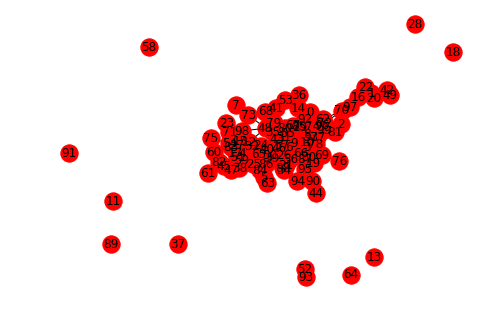

In [68]:
nx.draw(G_subs, with_labels=True)

## Cliques

Cliques are a fully connected group of nodes from within a graph. The simplest clique is an edge and the simplest complex clique is a transitive triad (or three fully connected nodes). 

A maximal clique is a clique that cannot be extended by adding a node in a graph (in other words, no additional nodes could be added because then the nodes wouldn't all be fully connected). 

In [92]:
# find_cliques() returns all maximal cliques in a graph as a generator object
nx.find_cliques(G)

<generator object find_cliques at 0x103037678>

In [106]:
cliques = nx.find_cliques(G)

# Count and print the number of maximal cliques in G
print(len(list(cliques)))

41


In [110]:
cliques = nx.find_cliques(G)
for clique in cliques:
    print(clique)

[4, 2]
[4, 3]
[4, 6, 13]
[4, 6, 14]
[4, 7, 14]
[4, 19]
[6, 0, 11]
[6, 0, 14]
[6, 1, 10]
[6, 8, 13]
[6, 8, 14]
[6, 10, 11]
[6, 17]
[8, 18, 3]
[8, 18, 13]
[8, 18, 14]
[8, 19]
[8, 15]
[9, 0, 18, 3]
[9, 0, 18, 5]
[9, 0, 18, 14]
[9, 0, 19]
[9, 0, 7, 5]
[9, 0, 7, 14]
[9, 1, 3]
[9, 1, 10]
[9, 1, 2]
[9, 2, 18]
[9, 10, 5]
[9, 17, 18, 3]
[9, 17, 19]
[11, 0, 12]
[11, 0, 7]
[12, 0, 14]
[12, 1]
[12, 13]
[12, 16]
[15, 16, 17]
[15, 2]
[16, 10]
[16, 18, 17]


In [112]:
cliques = nx.find_cliques(G)
list(cliques)

[[4, 2],
 [4, 3],
 [4, 6, 13],
 [4, 6, 14],
 [4, 7, 14],
 [4, 19],
 [6, 0, 11],
 [6, 0, 14],
 [6, 1, 10],
 [6, 8, 13],
 [6, 8, 14],
 [6, 10, 11],
 [6, 17],
 [8, 18, 3],
 [8, 18, 13],
 [8, 18, 14],
 [8, 19],
 [8, 15],
 [9, 0, 18, 3],
 [9, 0, 18, 5],
 [9, 0, 18, 14],
 [9, 0, 19],
 [9, 0, 7, 5],
 [9, 0, 7, 14],
 [9, 1, 3],
 [9, 1, 10],
 [9, 1, 2],
 [9, 2, 18],
 [9, 10, 5],
 [9, 17, 18, 3],
 [9, 17, 19],
 [11, 0, 12],
 [11, 0, 7],
 [12, 0, 14],
 [12, 1],
 [12, 13],
 [12, 16],
 [15, 16, 17],
 [15, 2],
 [16, 10],
 [16, 18, 17]]

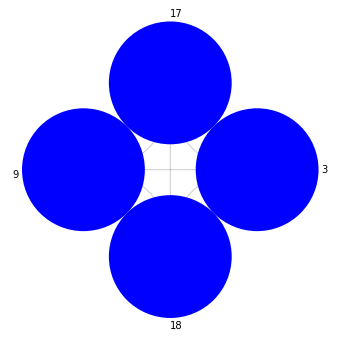

In [117]:
# Find the node(s) that are part of the largest maximal clique: largest_clique
# note: there are multiple largest maximal cliques in this graph - each of 4 nodes
largest_clique = sorted(nx.find_cliques(G), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: G_lc
G_lc = G.subgraph(largest_clique)

# Create the CircosPlot object: c
c = nv.CircosPlot(G_lc,node_labels=True)

# Draw the CircosPlot to the screen
c.draw()
plt.show()

## Simple Recommendation System

Here, we'll use the toy graph data to make a sort of 'people you might know' recommendation system. This is built around the concept of open triangles - i.e. if one person knows two other people who aren't connected in a graph, it's likely that they might know each other. We'll also leverage the concept of degree centrality to determine who important individuals are in the graph to enhance recommendations. The basic nuts and bolts of this are:
* Find the most important individuals (by degree centrality)
* Find largest communities of connected individuals (via maximal cliques)
* Make recommendations (via the concept of open triangles)

In [119]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(G)

# Compute the maximum degree centrality: max_dc
max_dc = max(list(deg_cent.values()))

# Find the user(s) that have the most relationships
prolific_users = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(prolific_users)

[9]


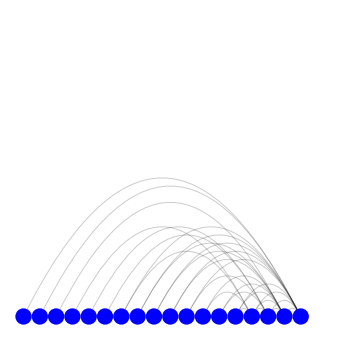

In [121]:
# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(G), key=lambda x: len(x))[-1])

# Create a subgraph from the largest_max_clique: G_lmc
G_lmc = G.subgraph(largest_max_clique).copy()  

# Go out 1 degree of separation
for node in list(G_lmc.nodes()):
    G_lmc.add_nodes_from(G.neighbors(node))
    G_lmc.add_edges_from(zip([node]*len(list(G.neighbors(node))), G.neighbors(node)))

# Record each node's degree centrality score
for n in G_lmc.nodes():
    G_lmc.node[n]['degree centrality'] = nx.degree_centrality(G_lmc)[n]

# Create the ArcPlot object: a
a = nv.ArcPlot(G_lmc, node_order='degree centrality')

# Draw the ArcPlot to the screen
a.draw()

In [129]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in G.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):

            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-15]]
print(top10_pairs)


[(3, 6), (3, 14), (3, 19), (6, 9), (6, 12), (6, 18), (4, 9), (0, 4), (0, 8), (0, 17), (4, 8), (8, 17), (13, 14)]


In [128]:
all_counts[-15]

4